In [58]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [24]:
sentences = [
    'Memory engram mouse LTP',
    'Memory amnesia disease injury',
    'spatial memory LTP CA1'
]

sentences_split = []

for el in range(0, len(sentences)):
    sentences_split.append(sentences[el].lower().split())

In [25]:
sentences_split

[['memory', 'engram', 'mouse', 'ltp'],
 ['memory', 'amnesia', 'disease', 'injury'],
 ['spatial', 'memory', 'ltp', 'ca1']]

In [44]:
G = nx.Graph()

In [45]:
for sentence in sentences_split:
    for word in sentence:
        if word not in G.nodes:
            G.add_node(word)

In [46]:
G.nodes

NodeView(('memory', 'engram', 'mouse', 'ltp', 'amnesia', 'disease', 'injury', 'spatial', 'ca1'))

In [47]:
for sentence in sentences_split:
    for combination in itertools.combinations(sentence, 2):
        if G.has_edge(combination[0], combination[1]) or G.has_edge(combination[1], combination[0]):
            G[combination[0]][combination[1]]['weight'] += 1
        else:
            G.add_edge(combination[0], combination[1], weight = 1)

In [48]:
print(G.edges(data=True))

[('memory', 'engram', {'weight': 1}), ('memory', 'mouse', {'weight': 1}), ('memory', 'ltp', {'weight': 2}), ('memory', 'amnesia', {'weight': 1}), ('memory', 'disease', {'weight': 1}), ('memory', 'injury', {'weight': 1}), ('memory', 'spatial', {'weight': 1}), ('memory', 'ca1', {'weight': 1}), ('engram', 'mouse', {'weight': 1}), ('engram', 'ltp', {'weight': 1}), ('mouse', 'ltp', {'weight': 1}), ('ltp', 'spatial', {'weight': 1}), ('ltp', 'ca1', {'weight': 1}), ('amnesia', 'disease', {'weight': 1}), ('amnesia', 'injury', {'weight': 1}), ('disease', 'injury', {'weight': 1}), ('spatial', 'ca1', {'weight': 1})]


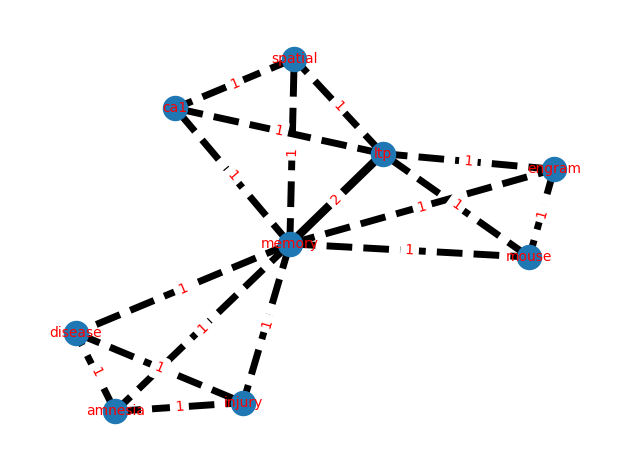

In [63]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

pos = nx.spring_layout(G, seed=7)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=5, style="dashed")

nx.draw_networkx_labels(G, pos, font_size=10, font_color="r", font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10, font_color="r")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()